<a href="https://colab.research.google.com/github/Imran-Muhammad-AI/AI-in-Enterprise/blob/main/Face_KeyPoint_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment#1 , Student : Muhammad Imran , Id: 100805394**

** Used Residual Neural Network for training

** Dataset taken from Kaggle cometition

** Model trained and weights saved in file

** Model loaded from saved file and used it for predicting.

# **colab links**
Notebook :
https://colab.research.google.com/drive/1FjMM_F1omn3Jt9NixLQKOX62cioedWNs?usp=sharing

Data:
https://drive.google.com/file/d/18FTeuJcaJ75kVIM5Iy35i6HmdspIq_vD/view?usp=sharing

Saved Model :
https://drive.google.com/file/d/1XRVg1B6t9rAv9IOaWgotK__Eaa6EHZje/view?usp=sharing

In [ ]:
##!pip install opencv-python

In [ ]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import Input
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
keyfacial_df = pd.read_csv('/content/drive/MyDrive/data/training.csv', header=0, sep=',', quotechar='"')


In [ ]:
keyfacial_df.shape

(7049, 31)

In [ ]:
keyfacial_df.head(5)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,"[[238, 236, 237, 238, 240, 240, 239, 241, 241,..."
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,"[[219, 215, 204, 196, 204, 211, 212, 200, 180,..."
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,"[[144, 142, 159, 180, 188, 188, 184, 180, 167,..."
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,"[[193, 192, 193, 194, 194, 194, 193, 192, 168,..."
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,"[[147, 148, 160, 196, 215, 214, 216, 217, 219,..."


In [ ]:
## Forward Fill
keyfacial_df.fillna(method = 'ffill',inplace = True)

In [ ]:
keyfacial_df['Image']

0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
                              ...                        
7044    71 74 85 105 116 128 139 150 170 187 201 209 2...
7045    60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046    74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047    254 254 254 254 254 238 193 145 121 118 119 10...
7048    53 62 67 76 86 91 97 105 105 106 107 108 112 1...
Name: Image, Length: 7049, dtype: object

### Image Preprocessing

In [ ]:
keyfacial_df['Image'].shape

(7049,)

In [ ]:
keyfacial_df['Image']=keyfacial_df['Image'].apply(lambda x:np.fromstring(x,dtype=int,sep=' ').reshape(96,96))

In [ ]:
keyfacial_df['Image'][0].shape

(96, 96)

### Visualizing Image

Plot a random image from the dataset along with facial keypoints. 
15 points( x and y )  coordinates for the corresponding image 
since x-coordinates are in even columns like 0,2,4,.. and y-coordinates are in odd columns like 1,3,5,..
we access their value using .loc command, which get the values for coordinates of the image based on the column it is refering to.

64.7686736842
       
37.2803368421
34.5013894737
       
42.9554526316
59.255346938900004
       
36.0651428573
73.9426938778
       
34.6246530614
37.4785306123
       
39.3980408165
22.0568163264
       
40.330122448800005
53.299787468199995
       
29.987657465799998
80.94778746819999
       
27.977535016799997
38.7792976723
       
33.3025962413
14.7988895088
       
35.9827595064
54.679578947399996
       
65.3406315789
72.6004325472
       
71.8620413443
34.2327590779
       
77.3394290995
51.5994529555
       
75.9635923646
55.625431578900006
       
77.00614736840001


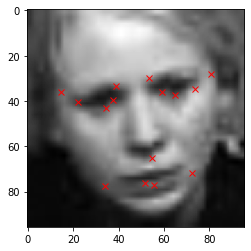

In [ ]:

i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
for j in range(1, 31, 2):
        print(keyfacial_df.loc[i][j-1])
        print("       ")
        print(keyfacial_df.loc[i][j])
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')
        

In [ ]:
keyfacial_df.loc[i]

left_eye_center_x                                                      64.7687
left_eye_center_y                                                      37.2803
right_eye_center_x                                                     34.5014
right_eye_center_y                                                     42.9555
left_eye_inner_corner_x                                                59.2553
left_eye_inner_corner_y                                                36.0651
left_eye_outer_corner_x                                                73.9427
left_eye_outer_corner_y                                                34.6247
right_eye_inner_corner_x                                               37.4785
right_eye_inner_corner_y                                                39.398
right_eye_outer_corner_x                                               22.0568
right_eye_outer_corner_y                                               40.3301
left_eyebrow_inner_end_x                            

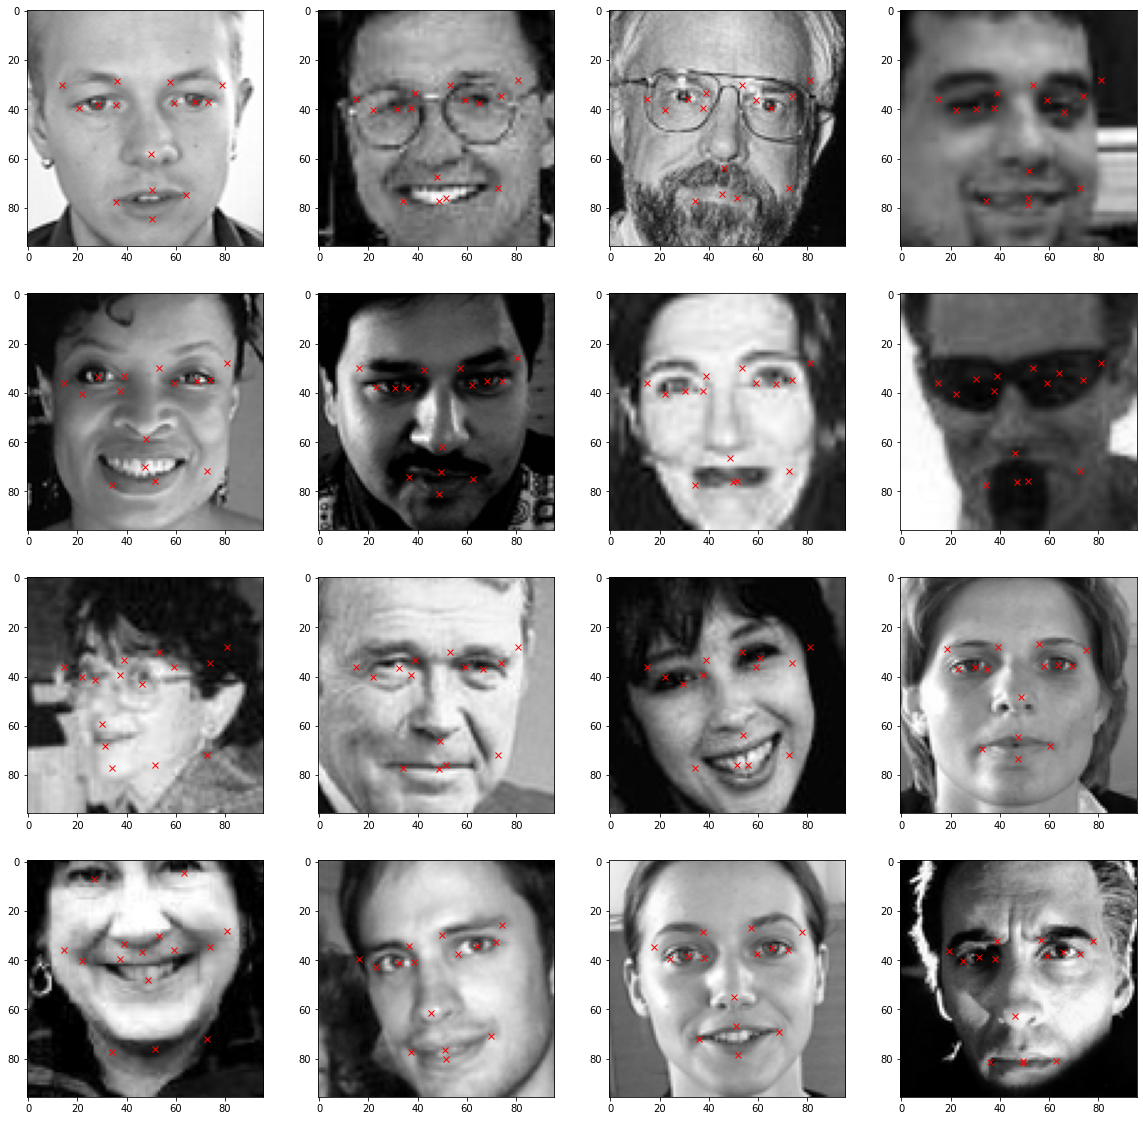

In [ ]:
import random
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    k=random.randint(1,len(keyfacial_df))
    ax = fig.add_subplot(4, 4, i + 1)
    image = plt.imshow(keyfacial_df['Image'][k],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[k][j-1], keyfacial_df.loc[k][j], 'rx')

###  Image Augmentation
Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

In [ ]:
#Creating a new copy of the dataframe
import copy
keyfacial_df_copy=copy.copy(keyfacial_df)

In [ ]:
columns =keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

### Horizontal flip
As Flipping horizontally , y coordiantes will be same, only x cordinate values will change ,So Subtract our x-coordinate  values from width of the image 96

In [ ]:
keyfacial_df_copy['Image']=keyfacial_df_copy['Image'].apply(lambda x:np.flip(x,axis=1))

for i in range(len(columns)):
    if i%2 == 0:
         keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x:96.-float(x))

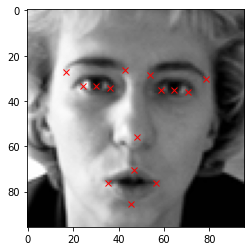

In [ ]:
# Original image
plt.imshow(keyfacial_df['Image'][1], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[1][j-1], keyfacial_df.loc[1][j], 'rx')

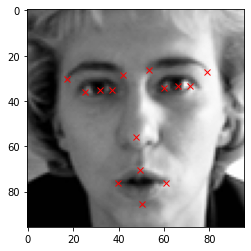

In [ ]:
# horizontal flip  image
plt.imshow(keyfacial_df_copy['Image'][1], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[1][j-1], keyfacial_df_copy.loc[1][j], 'rx')

### Vertical flip 
x-coordiantes will not change
y-coordinates will change 
horizontal-flip

In [ ]:
keyfacial_df_copy['Image']=keyfacial_df_copy['Image'].apply(lambda x:np.flip(x,axis=0))
for i in range(len(columns)):
    if i%2 == 1:
         keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x:96.-float(x))

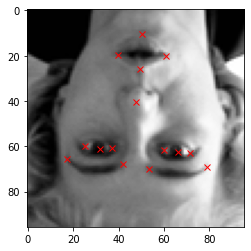

In [ ]:
plt.imshow(keyfacial_df_copy['Image'][1], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[1][j-1], keyfacial_df_copy.loc[1][j], 'rx')

### Increase Brightness

Randomingly increasing the brightness of the images
We multiply pixel values by random values between 1.5 and 2 to increase the brightness of the image
we clip the value between 0 and 255

In [ ]:


import random

# Concatenating the original dataframe with the augmented dataframe
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(21147, 31)

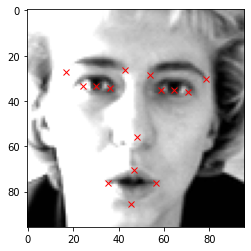

In [ ]:
#Image with increased brightness

plt.imshow(keyfacial_df_copy['Image'][1], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[1][j-1], keyfacial_df_copy.loc[1][j], 'rx')

### Data Normalization and Scaling

In [ ]:
#values of Image
img=augmented_df[:,30]

#Normalize the image
img=img/255.

# empty array to feed the model of shape(96,96,1)
X= np.empty((len(img),96,96,1))

#expanding dimensions to (96,96,1)
for i in range(len(img)):
    X[i,]=np.expand_dims(img[i],axis=2)

#Converting array type to float
X=np.asarray(X).astype(np.float32)

In [ ]:
y=augmented_df[:,:30]
y=np.asarray(y).astype(np.float32)
y.shape

(21147, 30)

### Train & Test Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(16917, 96, 96, 1)

In [ ]:
X_test.shape

(4230, 96, 96, 1)

## Residual Neural Network

In [ ]:
def res_block(X, filter, stage):
    
    

  # Convolutional_block
    X_copy = X

    f1 , f2, f3 = filter

  # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

  # Identity Block 1 - Reidua Block
    X_copy = X


  # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

  # Identity Block 2
    X_copy = X


  # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    return X

In [ ]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 102, 102, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

## Compile and Traning

loss function : MSE , Optamizer: Adam , Metrics : Accuracy

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

## CheckPoint
Save only Best : callback when there is an improvement in loss function otherwise return nothin and write nothing to history

In [ ]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "/content/drive/MyDrive/data/FaceFeaturesWeights2.hdf5", verbose = 1, save_best_only = True)

In [ ]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 50, validation_data=(X_test,y_test), callbacks=[checkpointer])

Epoch 1/50
529/529 [==============================] - 439s 822ms/step - loss: 365.1412 - accuracy: 0.4202 - val_loss: 32.6890 - val_accuracy: 0.7459

Epoch 00001: val_loss improved from inf to 32.68899, saving model to /content/drive/MyDrive/data/FaceFeaturesWeights2.hdf5
Epoch 2/50
529/529 [==============================] - 441s 834ms/step - loss: 15.7135 - accuracy: 0.6712 - val_loss: 12.5308 - val_accuracy: 0.7752

Epoch 00002: val_loss improved from 32.68899 to 12.53085, saving model to /content/drive/MyDrive/data/FaceFeaturesWeights2.hdf5
Epoch 3/50
529/529 [==============================] - 434s 820ms/step - loss: 13.6763 - accuracy: 0.7236 - val_loss: 9.0620 - val_accuracy: 0.8097

Epoch 00003: val_loss improved from 12.53085 to 9.06199, saving model to /content/drive/MyDrive/data/FaceFeaturesWeights2.hdf5
Epoch 4/50
529/529 [==============================] - 435s 823ms/step - loss: 11.4987 - accuracy: 0.7586 - val_loss: 7.9339 - val_accuracy: 0.8213

Epoch 00004: val_loss impro

# **Reading saved model**

In [ ]:
model = load_model('/content/drive/MyDrive/data/FaceFeaturesWeights2.hdf5')

# **Predict**

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
test_preds.shape

(4230, 30)

# **Sample Predict - Display**

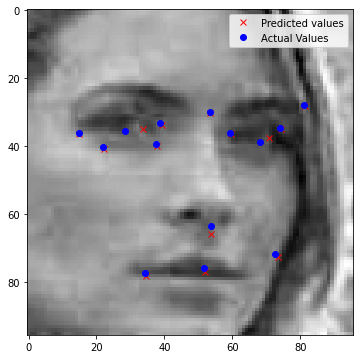

In [ ]:
i=random.randint(1,len(test_preds))
plt.figure(figsize=(6,6))
plt.imshow(np.squeeze(X_test[i]), cmap ='gray')
for j in range(0, 28, 2):
    plt.plot(test_preds[i][j], test_preds[i][j+1], 'rx',label='Predicted values')
    plt.plot(y_test[i][j], y_test[i][j+1], 'bo',label='Actual Values')
    
# Function add a legend   
plt.legend(["Predicted values", "Actual Values"], loc ="best") 
  
# function to show the plot 
plt.show() 